In [1]:
 import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.metrics import accuracy_score,r2_score

In [2]:
from sklearn.datasets import load_digits

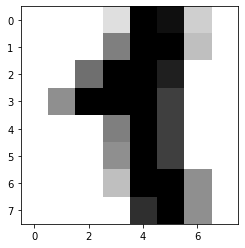

In [3]:
data=load_digits()
#print(data)
np.shape(data.images[0])
# plt.imshow(data.images[65],cmap="gray")
plt.imshow(data.images[456],cmap=matplotlib.cm.binary)


In [4]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,train_size=0.8)

In [5]:
lg=LogisticRegression()
model=lg.fit(x_train,y_train)

C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:

from sklearn.metrics import confusion_matrix

In [7]:
confusion_matrix(y_test,model.predict(x_test))

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  0, 27,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 29,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  2, 27]], dtype=int64)

In [8]:
r2_score(y_test,model.predict(x_test))

0.8586063776926899

In [9]:
accuracy_score(y_test,model.predict(x_test))

0.9583333333333334

# another example

In [10]:
bank=pd.read_csv("UniversalBank.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
def fixexperience(value):
    if value<0:
        return 0
    else:
        return value
bank['Experience']=bank.apply(lambda row:fixexperience(row['Experience']), axis=1)

In [13]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
bank.drop(['ZIP Code'], axis=1, inplace=True) #generally this is not permanent function but inplace helps to make it perminent

In [15]:
bank

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4.0,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39.0,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40.0,49,3,0.5,2,0,0,0,0,1,0


In [16]:
bank.set_index('ID',inplace=True)#generally this is not permanent function but inplace helps to make it perminent

In [17]:
bank

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1.0,49,4,1.6,1,0,0,1,0,0,0
2,45,19.0,34,3,1.5,1,0,0,1,0,0,0
3,39,15.0,11,1,1.0,1,0,0,0,0,0,0
4,35,9.0,100,1,2.7,2,0,0,0,0,0,0
5,35,8.0,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3.0,40,1,1.9,3,0,0,0,0,1,0
4997,30,4.0,15,4,0.4,1,85,0,0,0,1,0
4998,63,39.0,24,2,0.3,3,0,0,0,0,0,0


In [18]:
#making educatin into only two columns with 0 and 1 '''for n different values in columns we can make n-1 new columns with 0 and 1 with dummy '''zbank=pd.get_dummies(bank,columns=['Education'],drop_first=True)
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1.0,49,4,1.6,1,0,0,1,0,0,0
2,45,19.0,34,3,1.5,1,0,0,1,0,0,0
3,39,15.0,11,1,1.0,1,0,0,0,0,0,0
4,35,9.0,100,1,2.7,2,0,0,0,0,0,0
5,35,8.0,45,4,1.0,2,0,0,0,0,0,1


In [19]:
#renaming columns
bank.rename(columns={'Education_2':'Grad','Education_3':"ADV grad"},inplace=True)
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1.0,49,4,1.6,1,0,0,1,0,0,0
2,45,19.0,34,3,1.5,1,0,0,1,0,0,0
3,39,15.0,11,1,1.0,1,0,0,0,0,0,0
4,35,9.0,100,1,2.7,2,0,0,0,0,0,0
5,35,8.0,45,4,1.0,2,0,0,0,0,0,1


In [20]:
x_train,x_test,y_train,y_test=train_test_split(bank.drop("Personal Loan",axis=1),bank["Personal Loan"],test_size=0.3,random_state=2)
y_train

ID
2417    0
2418    0
2514    0
1699    0
3323    0
       ..
3336    0
1100    0
2515    0
3607    0
2576    0
Name: Personal Loan, Length: 3500, dtype: int64

In [21]:
lg=LogisticRegression()
model2=lg.fit(x_train,y_train)

C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
print(confusion_matrix(y_train,model2.predict(x_train)))
print(confusion_matrix(y_test,model2.predict(x_test)))

[[3111   47]
 [ 122  220]]
[[1340   22]
 [  65   73]]


In [23]:
print(accuracy_score(y_train,model2.predict(x_train)))
accuracy_score(y_test,model2.predict(x_test))


0.9517142857142857


0.942

In [24]:
print(cross_validate(model2,X=x_train,y=y_train))
cross_validate(model2,X=x_test,y=y_test)

C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

{'fit_time': array([0.16390514, 0.14591241, 0.16290832, 0.13992095, 0.16690326]), 'score_time': array([0.0029974 , 0.00399971, 0.00299931, 0.00299764, 0.00399661]), 'test_score': array([0.96285714, 0.94142857, 0.93857143, 0.93857143, 0.95285714])}


C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

{'fit_time': array([0.12592745, 0.12293077, 0.13991833, 0.1459198 , 0.10093951]),
 'score_time': array([0.00299716, 0.0059967 , 0.00199842, 0.00299954, 0.00400043]),
 'test_score': array([0.94333333, 0.93      , 0.93666667, 0.95333333, 0.91666667])}

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [26]:
#more is the roc_auc_acore more better is our model which is are under roc curve
lg_Roc_Auc=roc_auc_score(y_train,model2.predict(x_train))
false_positive_rate,true_positive_rate,threshould=roc_curve(y_train,model2.predict(x_train))

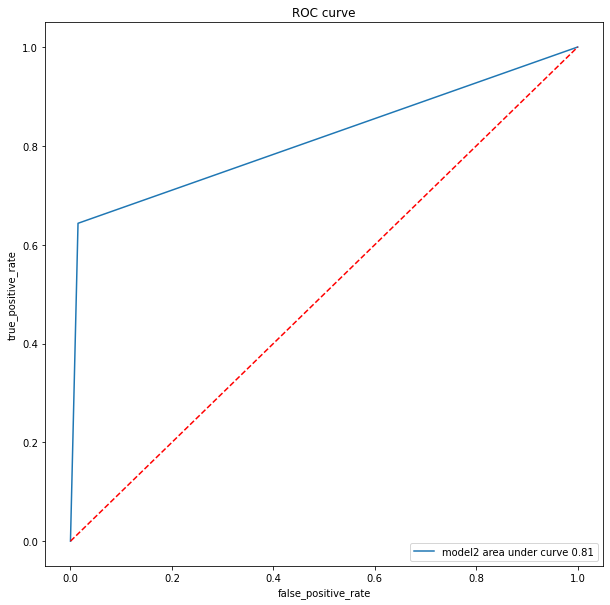

In [27]:
plt.figure(figsize=(10,10))
plt.plot(false_positive_rate,true_positive_rate,label="model2 area under curve %0.2f"%lg_Roc_Auc)
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title("ROC curve")
plt.plot([0,1],"r--")
plt.legend(loc="lower right")
plt.show()

In [28]:
x_train2,x_test2,y_train2,y_test2=train_test_split(bank.drop(columns=["Personal Loan","Experience","Income","Mortgage"],axis=1),bank["Personal Loan"],test_size=0.3)


In [29]:
lg3=LogisticRegression()
model3=lg.fit(x_train2,y_train2)

C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


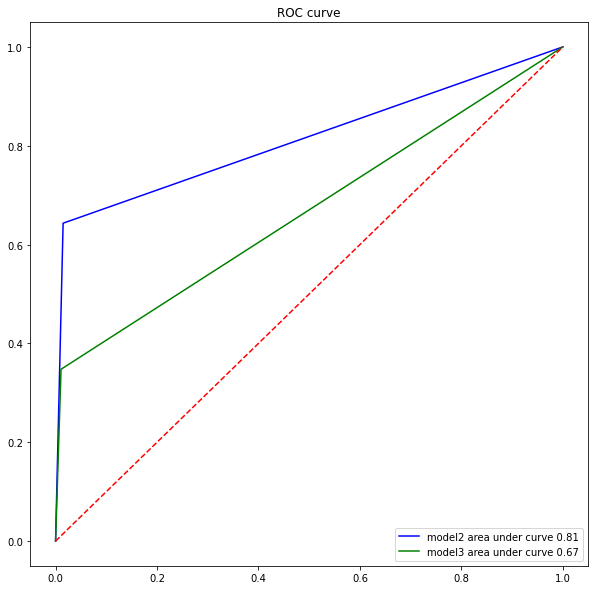

In [30]:
lg_Roc_Auc2=roc_auc_score(y_train2,model3.predict(x_train2))
false_positive_rate2,true_positive_rate2,threshould2=roc_curve(y_train2,model3.predict(x_train2))

plt.figure(figsize=(10,10))
plt.plot(false_positive_rate,true_positive_rate,label="model2 area under curve %0.2f"%lg_Roc_Auc,c="b")
plt.plot(false_positive_rate2,true_positive_rate2,label="model3 area under curve %0.2f"%lg_Roc_Auc2,c="g")
#plt.xlabel('false_positive_rate')
#plt.ylabel('true_positive_rate')
plt.title("ROC curve")
plt.plot([0,1],"r--")
plt.legend(loc="lower right")
plt.show()

# statsmodels

In [1]:
import statsmodels.api as sm


#for single variable

In [ ]:
x=bank['Income']
x=sm.add_constant(x)
x_train,x_test,y_train,y_test=train_test_split(x,bank["Personal Loan"])

In [ ]:
log1=sm.Logit(y_train,x_train)
model4=log1.fit()
model4.summary()

#multy variable

In [ ]:
x_train2,x_test2,y_train2,y_test2=train_test_split(bank.drop(columns=["Personal Loan"],axis=1),bank["Personal Loan"])
log2=sm.Logit(y_train2,x_train2)
model5=log2.fit()
model5.summary()

#pseudo R-squ should be high for better model
#p should be  low    which means high p value features are not more effecting the model and can be removed
#z shouls be high
#std err should be low

In [ ]:
model5.predict(x_test)

# select from model '''new model''' which gives the best parameters for the data

In [32]:
from sklearn.feature_selection import SelectFromModel as se
x_train=pd.DataFrame(x_train)
y_train=pd.DataFrame(y_train)
model6=se(LogisticRegression(),max_features=8).fit(x_train,y_train)
model6.get_support()


C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([False, False, False,  True, False,  True, False, False,  True,
        True, False])

# using of pipelines and data modifing

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn .decomposition import PCA


In [35]:
from sklearn.pipeline  import Pipeline

In [36]:
lg=Pipeline([("scaler",StandardScaler()),("p1",PCA()),("lgm",LogisticRegression())])

In [37]:
model7=lg.fit(x_train2,y_train2)

In [38]:
accuracy_score(y_test2,model7.predict(x_test2))

0.9266666666666666